**Logistic Regression & XGBoost**

---
1. Data Proccessing
2. Imbalanced Data Handling
3. Checking best Parameter for Logistic Regression
4. Applying Logistic Model
5. Evaluationg the Model
6. Check whethere Overfit or not
7. Applying XGBoost Classifier.
8. Evauationg Model (CV)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heart Disease.csv')

In [ ]:
df.shape

(319795, 18)

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

**1. Data Proccessing**

---



In [ ]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [ ]:
df['MentalHealth'].value_counts()

In [ ]:
df['PhysicalHealth'].value_counts()

<AxesSubplot:xlabel='BMI'>

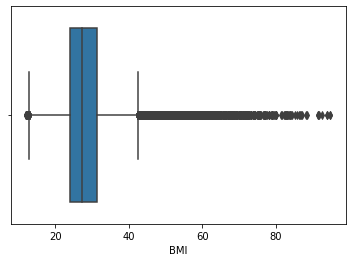

In [ ]:
# Checking outliers on BMI column
sns.boxplot(df['BMI'])

In [ ]:
df.shape

(319795, 18)

In [ ]:
# Removing outliers greater than 42
df = df[~(df['BMI']>42)]

In [ ]:
df.shape 

(308648, 18)

In [ ]:
df['AgeCategory']

0               55-59
1         80 or older
2               65-69
3               75-79
4               40-44
             ...     
319789          18-24
319790          60-64
319791          35-39
319792          45-49
319793          25-29
Name: AgeCategory, Length: 308648, dtype: object

In [ ]:
# Counting Minimum age from Age Category Column

df['AgeCategory'] = df['AgeCategory'].replace(('80 or older'), ('80-0'))

In [ ]:
df['AgeCategory']

0         55-59
1          80-0
2         65-69
3         75-79
4         40-44
          ...  
319789    18-24
319790    60-64
319791    35-39
319792    45-49
319793    25-29
Name: AgeCategory, Length: 308648, dtype: object

In [ ]:
df['AgeCategory']=df['AgeCategory'].str.replace(pat=r'-',repl=' ', regex=False)

In [ ]:
df['AgeCategory']

0               55 59
1         80 or older
2               65 69
3               75 79
4               40 44
             ...     
319789          18 24
319790          60 64
319791          35 39
319792          45 49
319793          25 29
Name: AgeCategory, Length: 308648, dtype: object

In [ ]:
df['AgeCategory']=df['AgeCategory'].str.split()

In [ ]:
df['AgeCategory'] 

0                [55, 59]
1         [80, or, older]
2                [65, 69]
3                [75, 79]
4                [40, 44]
               ...       
319789           [18, 24]
319790           [60, 64]
319791           [35, 39]
319792           [45, 49]
319793           [25, 29]
Name: AgeCategory, Length: 308648, dtype: object

In [ ]:
df['Min AgeCategory'] = df['AgeCategory'].apply(lambda x: x[0])


In [ ]:
df['Min AgeCategory']

0         55
1         80
2         65
3         75
4         40
          ..
319789    18
319790    60
319791    35
319792    45
319793    25
Name: Min AgeCategory, Length: 308648, dtype: object

In [ ]:
df['Min AgeCategory'] = df['Min AgeCategory'].astype('int')

In [ ]:
df['AgeCategory'] = df['Min AgeCategory']

In [ ]:
df['AgeCategory']

0         55
1         80
2         65
3         75
4         40
          ..
319789    18
319790    60
319791    35
319792    45
319793    25
Name: AgeCategory, Length: 308648, dtype: int64

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Max AgeCategory,Min AgeCategory
0,No,16.60,Yes,No,No,3,30,No,Female,55,White,Yes,Yes,Very good,5,Yes,No,Yes,55,59
1,No,20.34,No,No,Yes,0,0,No,Female,80,White,No,Yes,Very good,7,No,No,No,80,0
2,No,26.58,Yes,No,No,20,30,No,Male,65,White,Yes,Yes,Fair,8,Yes,No,No,65,69
3,No,24.21,No,No,No,0,0,No,Female,75,White,No,No,Good,6,No,No,Yes,75,79
4,No,23.71,No,No,No,28,0,Yes,Female,40,White,No,Yes,Very good,8,No,No,No,40,44


In [ ]:
df = df.drop(['Min AgeCategory'], axis = 1)

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40,White,No,Yes,Very good,8,No,No,No


In [ ]:
# Droping duplicates indice
df = df.drop_duplicates()

In [ ]:
df.shape

(290579, 18)

**2. Handling Imbalanced Data**

---



<AxesSubplot:xlabel='Smoking', ylabel='count'>

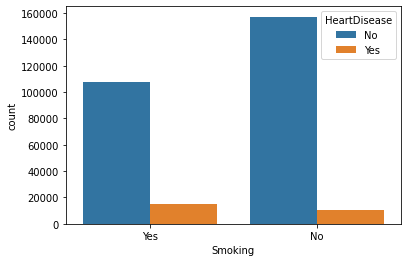

In [ ]:
# Plotting imbalanced Data

sns.countplot(x = 'Smoking', hue='HeartDisease', data=df)

<AxesSubplot:xlabel='KidneyDisease', ylabel='count'>

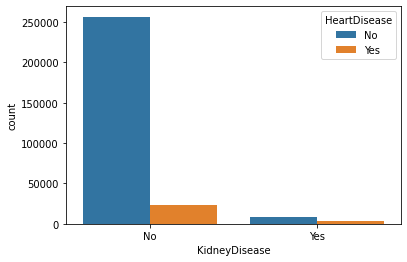

In [ ]:
sns.countplot(x = 'KidneyDisease', hue='HeartDisease', data=df)

In [ ]:
df['KidneyDisease'].value_counts()

No     279534
Yes     11045
Name: KidneyDisease, dtype: int64

In [ ]:
# Encoding boolean Data Using Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,55,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,65,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,75,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,40,5,0,1,4,8,0,0,0


In [ ]:
# seperate test and target column

x = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [ ]:
x.shape

(290579, 17)

In [ ]:
y.value_counts()

0    264589
1     25990
Name: HeartDisease, dtype: int64

In [ ]:
# Resampling using NearMiss Undersampling

from imblearn.under_sampling import NearMiss
nrms = NearMiss()

In [ ]:
# Separate resampled target attribute
X, Y = nrms.fit_resample(x, y)

In [ ]:
Y.value_counts()

0    25990
1    25990
Name: HeartDisease, dtype: int64

In [ ]:
df.isnull().sum()

In [ ]:
# Separating Data for Training and testing

from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,train_size=.70, random_state=42)

In [ ]:
xtest.shape

(15594, 17)

**3. Checking Best parameter** 

---



In [ ]:
# Importing Model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
import numpy as np

In [ ]:
# Declaring Possible Paramters

grids = {
    'penalty': ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver': ['newton-cholesky', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

In [ ]:
# Hyper Paramter Tuning with Grid Search

from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating GridSearchCV Object
gc = GridSearchCV(lr, grids,cv=5)

In [ ]:
# Applying tuning

gc.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cholesky', 'sag', 'saga']})

In [ ]:
gc.best_params_

{'C': 0.08858667904100823,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'sag'}

In [ ]:
# Best Paramters for Logistic Regression
gc.best_estimator_

LogisticRegression(C=0.08858667904100823, multi_class='multinomial',
                   solver='sag')

**4. Applying the Model with its best Paramter**s

---



In [ ]:
# Creating an object for the Model

lr2 = LogisticRegression(C=0.08858667904100823, multi_class='multinomial',
                   solver='sag') 

In [ ]:
lr2.fit(xtrain, ytrain) # Model Training

LogisticRegression(C=0.08858667904100823, multi_class='multinomial',
                   solver='sag')

In [ ]:
pred = lr2.predict(xtest) # predict the output

In [ ]:
pred

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
lr2.score(xtest, ytest) # accuracy

0.8535975375144286

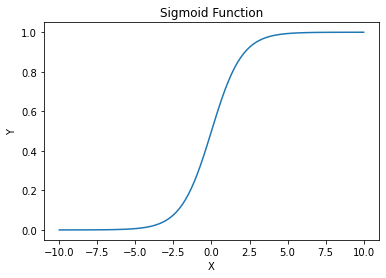

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create a range of values for the x-axis
x = np.linspace(-10, 10, 100)

# Calculate the sigmoid function for each value of x
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


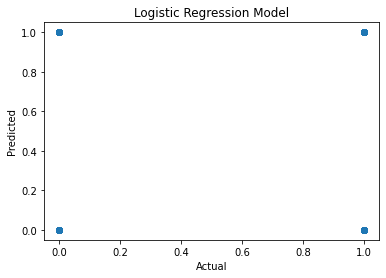

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Create a scatter plot of actual vs predicted probabilities
plt.scatter(ytest, pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Logistic Regression Model')
plt.show()


**5. Evaluating LR Model**

---



In [ ]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix

In [ ]:
print(classification_report(ytest,pred)) # Model Performance Report

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      7733
           1       0.93      0.77      0.84      7861

    accuracy                           0.85     15594
   macro avg       0.86      0.85      0.85     15594
weighted avg       0.86      0.85      0.85     15594



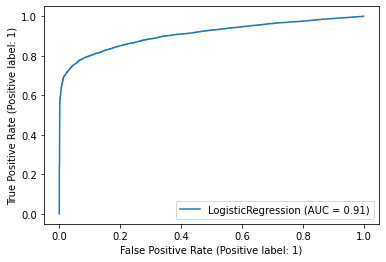

In [ ]:
# Plotting ROC Curve

import matplotlib.pyplot as plt
plot_roc_curve(lr2, xtest, ytest)
plt.show()

In [ ]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [ ]:
test_confusion_matrix

array([[7270,  463],
       [1820, 6041]])

<AxesSubplot:>

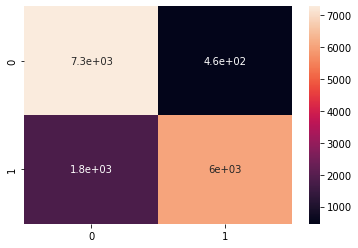

In [ ]:
# Heatmap of Confusion Matrix

sns.heatmap(test_confusion_matrix, annot=True)

**6. Check Whether Overfit or NOt**

---



In [ ]:
# importing K-fold Cross Validation

from sklearn.model_selection import KFold, cross_val_score

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
result = cross_val_score(lr2, X, Y, cv=kfold)

In [ ]:
result

array([0.85205848, 0.85763755, 0.85494421, 0.85090419, 0.848788  ,
       0.85532897, 0.86225471, 0.85648326, 0.848788  , 0.85032705])

In [ ]:
result.mean()

0.8537514428626396

**7. XGBoost Classifier Model**

---



In [ ]:
!pip install XGBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing XGBoost

import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
xgb.fit(xtrain, ytrain) # training Data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb.score(xtest, ytest) # testing Accuracy

0.8777735026292164

In [ ]:
pred = xgb.predict(xtest)

**8. Model Evaluating**

---



In [ ]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, RocCurveDisplay

In [ ]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7733
           1       0.94      0.81      0.87      7861

    accuracy                           0.88     15594
   macro avg       0.88      0.88      0.88     15594
weighted avg       0.89      0.88      0.88     15594



In [ ]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [ ]:
test_confusion_matrix

array([[7319,  414],
       [1492, 6369]])

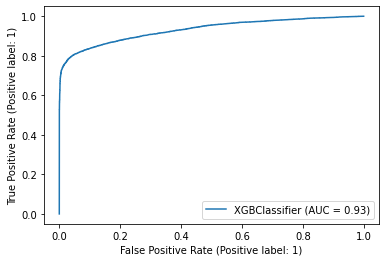

In [ ]:
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(xgb, xtest, ytest)
plt.show()

In [ ]:
# Model Validation using K-fold Cross Validiation

from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=4, shuffle=True)

In [ ]:
result = cross_val_score(xgb, X, Y, cv=kfold)

In [ ]:
result

array([0.87433628, 0.88172374, 0.87418238, 0.87572143])

In [ ]:
result.mean()

0.8764909580607927